In [3]:
import pickle

import pandas as pd
import gutils
from sklearn.linear_model import LogisticRegression

In [4]:
# Load the sklearn model using pickle
with open("../models/meter_rf.pkl", "rb") as f:
    model: LogisticRegression
    model = pickle.load(f)

# Load the dataframes
df = pd.read_parquet("../../data/time_slices.parquet")
games = pd.read_parquet("../../data/games.parquet")

In [5]:
game = 30227
season = 2009
filtered_df = df[(df["game"] == game) & (df["season"] == season)]

X = filtered_df.drop(columns=["winner", "game", "season"])

probabilities = model.predict_proba(X)

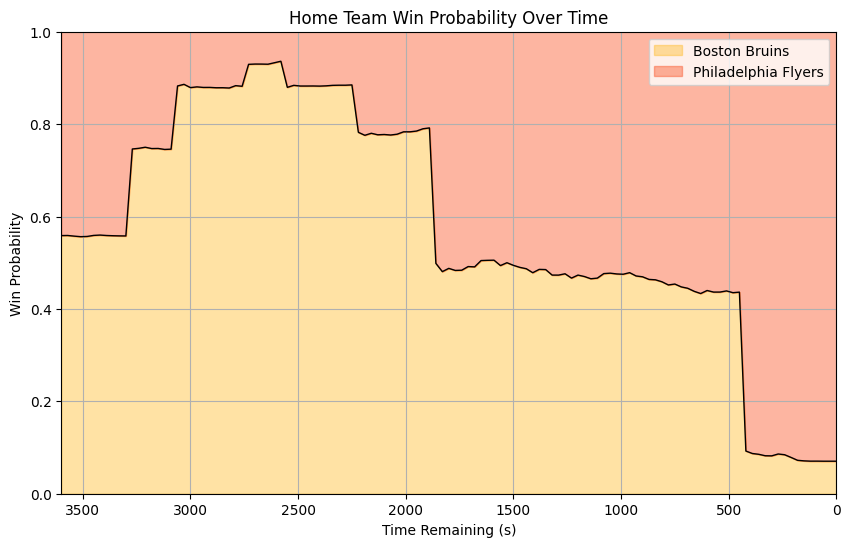

In [6]:
filtered_game = games[(games["Game_Id"] == str(game)) & (games["Season"] == season)]
home = gutils.team_name_color(filtered_game.iloc[0]["Home_Team"])
away = gutils.team_name_color(filtered_game.iloc[0]["Away_Team"])

gutils.graph_probabilities(filtered_df["time_remaining"] * 3600, probabilities[:, 1], home, away)